In [1]:
import os
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir("./")

['.git',
 '.ipynb_checkpoints',
 '.vscode',
 'cars segmentation.ipynb',
 'data',
 'dataset.py',
 'eval.py',
 'image_train.txt',
 'inspect_dataset.ipynb',
 'label_train.txt',
 'log',
 'model.py',
 'model_Unet.py',
 'output_weights',
 'README.md',
 'runs',
 'train.py',
 'utils_dataset.py',
 'utils_metrics.py',
 '__pycache__']

In [3]:
with open("./image_train.txt", "r") as fp:
    images_fps =[f.strip('\n') for f in fp.readlines()]
    
with open("./label_train.txt", "r") as fp:
    masks_fps =[f.strip('\n') for f in fp.readlines()]
    
print(images_fps[0])
print(masks_fps[0])
print(len(images_fps))
print(len(masks_fps))
print(os.path.exists(images_fps[0]))

D:/road02_seg\ColorImage\Record022\Camera 5\170927_070545637_Camera_5.jpg
D:/road02_seg\Label\Record022\Camera 5\170927_070545637_Camera_5_bin.png
22871
22871
True


In [4]:
def plot_image_examples(img_data, label_data, rows=3, cols=3, title='Image examples'):
    fig, axs1 = plt.subplots(rows, cols, figsize=(10,10))
    fig, axs2 = plt.subplots(rows, cols, figsize=(10,10))
    for row in range(rows):
        for col in range(cols):
            
            idx = np.random.randint(len(img_data), size=1)[0]
            print(idx)
            img_path = img_data[idx]
            label_path = label_data[idx]
            img = Image.open(img_path)
            label = Image.open(label_path)
            
            axs1[row, col].imshow(img)
            axs1[row, col].axis('off')
            
            axs2[row, col].imshow(label)
            axs2[row, col].axis('off')
            
#     plt.suptitle(title)

12636
11621
12672
12828


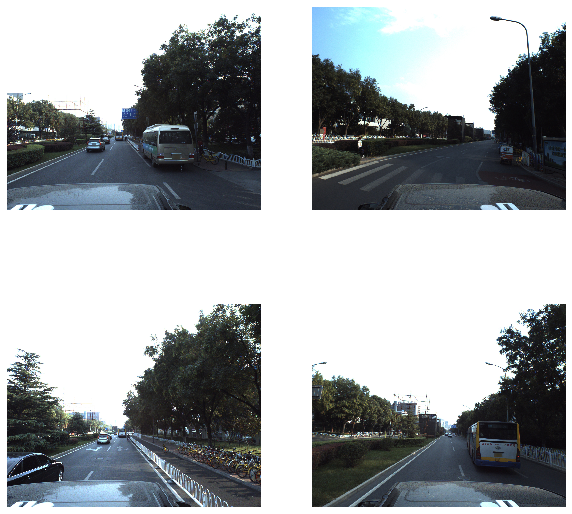

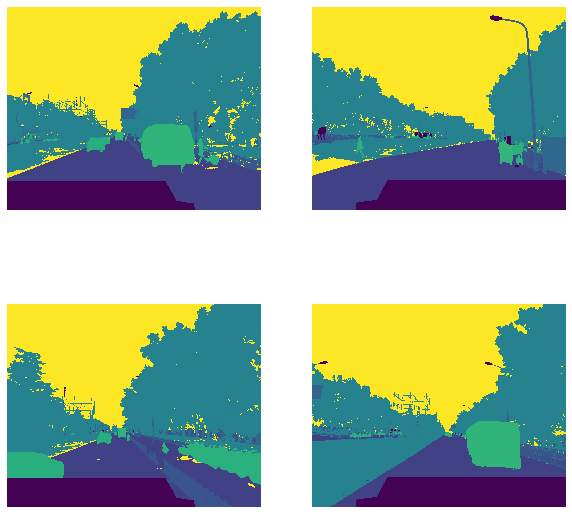

In [5]:
plot_image_examples(images_fps, masks_fps, rows=2, cols=2, title='Image examples')

6508
(2710, 3384, 3)
(2710, 3384, 3)


array([  0,   1,  49,  50,  65,  66,  67,  81,  82,  83,  84,  85,  97,
       113, 161, 162, 163, 164, 165, 166, 255], dtype=uint8)

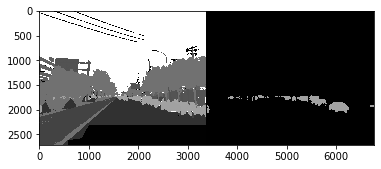

In [39]:
import cv2
# idx = np.random.randint(len(masks_fps)-1, size=1)[0]
print(idx)
idx = 6508
test_path = masks_fps[idx]
img = cv2.imread(images_fps[idx])
label = cv2.imread(test_path)
# label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
print(label.shape)
data = np.where(label == 161, label, 0)
print(data.shape)
vis = np.concatenate((label, data), axis=1)
plt.imshow(vis)
np.unique(label)

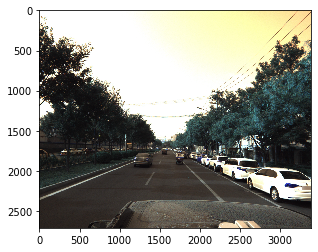

In [94]:
plt.imshow(img)
plt.show()

array([  0,   1,  17,  33,  39,  40,  49,  50,  67,  82,  83,  84,  85,
        97,  98, 113, 255], dtype=uint8)

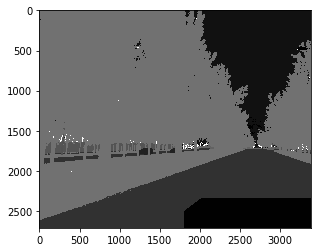

In [95]:
label_path = "./label/170908_061502408_Camera_5.png"
img_path = "./image/170908_061502408_Camera_5.jpg"
t1 = cv2.imread(label_path)
plt.imshow(t1)
np.unique(t1)

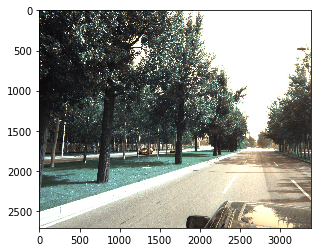

In [96]:
t2 = cv2.imread(img_path)
plt.imshow(t2)

In [97]:
from collections import namedtuple

In [98]:
Label = namedtuple('Label', [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class
    'clsId'       ,

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ])


In [99]:
labels = [
    #     name                    clsId    id   trainId   category  catId  hasInstanceignoreInEval   color
    Label('others'              ,    0 ,    0,   255   , '其他'    ,   0  ,False , True  , 0x000000 ),
    Label('rover'               , 0x01 ,    1,   255   , '其他'    ,   0  ,False , True  , 0X000000 ),
    Label('sky'                 , 0x11 ,   17,    0    , '天空'    ,   1  ,False , False , 0x4682B4 ),
    Label('car'                 , 0x21 ,   33,    1    , '移动物体',   2  ,True  , False , 0x00008E ),
    Label('car_groups'          , 0xA1 ,  161,    1    , '移动物体',   2  ,True  , False , 0x00008E ),  
    Label('motorbicycle'        , 0x22 ,   34,    2    , '移动物体',   2  ,True  , False , 0x0000E6 ),
    Label('motorbicycle_group'  , 0xA2 ,  162,    2    , '移动物体',   2  ,True  , False , 0x0000E6 ),
    Label('bicycle'             , 0x23 ,   35,    3    , '移动物体',   2  ,True  , False , 0x770B20 ),
    Label('bicycle_group'       , 0xA3 ,  163,    3    , '移动物体',   2  ,True  , False , 0x770B20 ),
    Label('person'              , 0x24 ,   36,    4    , '移动物体',   2  ,True  , False , 0x0080c0 ),
    Label('person_group'        , 0xA4 ,  164,    4    , '移动物体',   2  ,True  , False , 0x0080c0 ),
    Label('rider'               , 0x25 ,   37,    5    , '移动物体',   2  ,True  , False , 0x804080 ),
    Label('rider_group'         , 0xA5 ,  165,    5    , '移动物体',   2  ,True  , False , 0x804080 ),
    Label('truck'               , 0x26 ,   38,    6    , '移动物体',   2  ,True  , False , 0x8000c0 ),
    Label('truck_group'         , 0xA6 ,  166,    6    , '移动物体',   2  ,True  , False , 0x8000c0 ), 
    Label('bus'                 , 0x27 ,   39,    7    , '移动物体',   2  ,True  , False , 0xc00040 ),
    Label('bus_group'           , 0xA7 ,  167,    7    , '移动物体',   2  ,True  , False , 0xc00040 ),
    Label('tricycle'            , 0x28 ,   40,    8    , '移动物体',   2  ,True  , False , 0x8080c0 ),
    Label('tricycle_group'      , 0xA8 ,  168,    8    , '移动物体',   2  ,True  , False , 0x8080c0 ),
    Label('road'                , 0x31 ,   49,    9    , '平面'    ,   3  ,False , False , 0xc080c0 ),
    Label('siderwalk'           , 0x32 ,   50,    10   , '平面'    ,   3  ,False , False , 0xc08040 ),
    Label('traffic_cone'        , 0x41 ,   65,    11   , '路间障碍',   4  ,False , False , 0x000040 ),
    Label('road_pile'           , 0x42 ,   66,    12   , '路间障碍',   4  ,False , False , 0x0000c0 ),
    Label('fence'               , 0x43 ,   67,    13   , '路间障碍',   4  ,False , False , 0x404080 ),
    Label('traffic_light'       , 0x51 ,   81,    14   , '路边物体',   5  ,False , False , 0xc04080 ),
    Label('pole'                , 0x52 ,   82,    15   , '路边物体',   5  ,False , False , 0xc08080 ),
    Label('traffic_sign'        , 0x53 ,   83,    16   , '路边物体',   5  ,False , False , 0x004040 ),
    Label('wall'                , 0x54 ,   84,    17   , '路边物体',   5  ,False , False , 0xc0c080 ),
    Label('dustbin'             , 0x55 ,   85,    18   , '路边物体',   5  ,False , False , 0x4000c0 ),
    Label('billboard'           , 0x56 ,   86,    19   , '路边物体',   5  ,False , False , 0xc000c0 ),
    Label('building'            , 0x61 ,   97,    20   , '建筑'    ,   6  ,False , False , 0xc00080 ),
    Label('bridge'              , 0x62 ,   98,    255  , '建筑'    ,   6  ,False , True  , 0x808000 ),
    Label('tunnel'              , 0x63 ,   99,    255  , '建筑'    ,   6  ,False , True  , 0x800000 ),
    Label('overpass'            , 0x64 ,  100,    255  , '建筑'    ,   6  ,False , True  , 0x408040 ),
    Label('vegatation'          , 0x71 ,  113,    21   , '自然'    ,   7  ,False , False , 0x808040 ),
    Label('unlabeled'           , 0xFF ,  255,    255  , '未标注'  ,   8  ,False , True  , 0xFFFFFF ),
]

In [120]:
labels = [
    #     name                    clsId    id   trainId   category  catId  hasInstanceignoreInEval   color
    Label('others'              ,    0 ,    0,   25   , '其他'    ,   0  ,False , True  , 0x000000 ),
    Label('rover'               , 0x01 ,    1,   25   , '其他'    ,   0  ,False , True  , 0X000000 ),
    Label('sky'                 , 0x11 ,   17,    0    , '天空'    ,   1  ,False , False , 0x4682B4 ),
    Label('car'                 , 0x21 ,   33,    1    , '移动物体',   2  ,True  , False , 0x00008E ),
    Label('car_groups'          , 0xA1 ,  161,    1    , '移动物体',   2  ,True  , False , 0x00008E ),  
    Label('motorbicycle'        , 0x22 ,   34,    2    , '移动物体',   2  ,True  , False , 0x0000E6 ),
    Label('motorbicycle_group'  , 0xA2 ,  162,    2    , '移动物体',   2  ,True  , False , 0x0000E6 ),
    Label('bicycle'             , 0x23 ,   35,    3    , '移动物体',   2  ,True  , False , 0x770B20 ),
    Label('bicycle_group'       , 0xA3 ,  163,    3    , '移动物体',   2  ,True  , False , 0x770B20 ),
    Label('person'              , 0x24 ,   36,    4    , '移动物体',   2  ,True  , False , 0x0080c0 ),
    Label('person_group'        , 0xA4 ,  164,    4    , '移动物体',   2  ,True  , False , 0x0080c0 ),
    Label('rider'               , 0x25 ,   37,    5    , '移动物体',   2  ,True  , False , 0x804080 ),
    Label('rider_group'         , 0xA5 ,  165,    5    , '移动物体',   2  ,True  , False , 0x804080 ),
    Label('truck'               , 0x26 ,   38,    6    , '移动物体',   2  ,True  , False , 0x8000c0 ),
    Label('truck_group'         , 0xA6 ,  166,    6    , '移动物体',   2  ,True  , False , 0x8000c0 ), 
    Label('bus'                 , 0x27 ,   39,    7    , '移动物体',   2  ,True  , False , 0xc00040 ),
    Label('bus_group'           , 0xA7 ,  167,    7    , '移动物体',   2  ,True  , False , 0xc00040 ),
    Label('tricycle'            , 0x28 ,   40,    8    , '移动物体',   2  ,True  , False , 0x8080c0 ),
    Label('tricycle_group'      , 0xA8 ,  168,    8    , '移动物体',   2  ,True  , False , 0x8080c0 ),
    Label('road'                , 0x31 ,   49,    9    , '平面'    ,   3  ,False , False , 0xc080c0 ),
    Label('siderwalk'           , 0x32 ,   50,    10   , '平面'    ,   3  ,False , False , 0xc08040 ),
    Label('traffic_cone'        , 0x41 ,   65,    11   , '路间障碍',   4  ,False , False , 0x000040 ),
    Label('road_pile'           , 0x42 ,   66,    12   , '路间障碍',   4  ,False , False , 0x0000c0 ),
    Label('fence'               , 0x43 ,   67,    13   , '路间障碍',   4  ,False , False , 0x404080 ),
    Label('traffic_light'       , 0x51 ,   81,    14   , '路边物体',   5  ,False , False , 0xc04080 ),
    Label('pole'                , 0x52 ,   82,    15   , '路边物体',   5  ,False , False , 0xc08080 ),
    Label('traffic_sign'        , 0x53 ,   83,    16   , '路边物体',   5  ,False , False , 0x004040 ),
    Label('wall'                , 0x54 ,   84,    17   , '路边物体',   5  ,False , False , 0xc0c080 ),
    Label('dustbin'             , 0x55 ,   85,    18   , '路边物体',   5  ,False , False , 0x4000c0 ),
    Label('billboard'           , 0x56 ,   86,    19   , '路边物体',   5  ,False , False , 0xc000c0 ),
    Label('building'            , 0x61 ,   97,    20   , '建筑'    ,   6  ,False , False , 0xc00080 ),
    Label('bridge'              , 0x62 ,   98,    22  , '建筑'    ,   6  ,False , True  , 0x808000 ),
    Label('tunnel'              , 0x63 ,   99,    23  , '建筑'    ,   6  ,False , True  , 0x800000 ),
    Label('overpass'            , 0x64 ,  100,    24  , '建筑'    ,   6  ,False , True  , 0x408040 ),
    Label('vegatation'          , 0x71 ,  113,    21   , '自然'    ,   7  ,False , False , 0x808040 ),
    Label('unlabeled'           , 0xFF ,  255,    25  , '未标注'  ,   8  ,False , True  , 0xFFFFFF ),
]

In [121]:
# name to label object
name2label      = {label.name: label for label in labels}
# id to label object
id2label        = {label.id: label for label in labels}
# trainId to label object
trainId2label   = {label.trainId: label for label in reversed(labels)}
# category to list of label objects
category2labels = {}
for label in labels:
    category = label.category
    if category in category2labels:
        category2labels[category].append(label)
    else:
        category2labels[category] = [label]
color2label = {}
for label in labels:
    #color = (int(label.color[2:4],16),int(label.color[4:6],16),int(label.color[6:8],16))
    color = label.color
    r =  color // (256*256)
    g = (color-256*256*r) // 256
    b = (color-256*256*r-256*g)
    color2label[(r, g, b)] = [label]

In [122]:
def assureSingleInstanceName(name):
    # if the name is known, it is not a group
    if name in name2label:
        return name
    # test if the name actually denotes a group
    if not name.endswith("group"):
        return None
    # remove group
    name = name[:-len("group")]
    # test if the new name exists
    if not name in name2label:
        return None
    # test if the new name denotes a label that actually has instances
    if not name2label[name].hasInstances:
        return None
    # all good then
    return name

In [123]:
print("List of cityscapes labels:")
print("")
print("    {:>21} | {:>3} | {:>7} | {:>14} |".format('name', 'id', 'trainId', 'category')\
+  "{:>10} | {:>12} | {:>12}".format('categoryId', 'hasInstances', 'ignoreInEval'))
print("    " + ('-' * 98))
for label in labels:
    print("    {:>21} | {:>3} | {:>7} |".format(label.name, label.id, label.trainId)\
    + "  {:>14} |{:>10} ".format(label.category, label.categoryId)\
    + "| {:>12} | {:>12}".format(label.hasInstances, label.ignoreInEval ))
print("")

List of cityscapes labels:

                     name |  id | trainId |       category |categoryId | hasInstances | ignoreInEval
    --------------------------------------------------------------------------------------------------
                   others |   0 |      25 |              其他 |         0 |            0 |            1
                    rover |   1 |      25 |              其他 |         0 |            0 |            1
                      sky |  17 |       0 |              天空 |         1 |            0 |            0
                      car |  33 |       1 |            移动物体 |         2 |            1 |            0
               car_groups | 161 |       1 |            移动物体 |         2 |            1 |            0
             motorbicycle |  34 |       2 |            移动物体 |         2 |            1 |            0
       motorbicycle_group | 162 |       2 |            移动物体 |         2 |            1 |            0
                  bicycle |  35 |       3 |           

In [124]:
for key, val in name2label.items():
    print(key, val, "\n")
    break
for key, val in id2label.items():
    print(key, val.trainId, "\n")
    break
for key, val in color2label.items():
    print(key, val, "\n")
    break

others Label(name='others', clsId=0, id=0, trainId=25, category='其他', categoryId=0, hasInstances=False, ignoreInEval=True, color=0) 

0 25 

(0, 0, 0) [Label(name='rover', clsId=1, id=1, trainId=25, category='其他', categoryId=0, hasInstances=False, ignoreInEval=True, color=0)] 



In [125]:
from numpy import copy, random, arange

b = copy(t1)
for k, v in id2label.items():
    b[t1==k] = v.trainId
print(np.unique(t1))
print(np.unique(b))

[  0   1  17  33  39  40  49  50  67  82  83  84  85  97  98 113 255]
[ 0  1  7  8  9 10 13 15 16 17 18 20 21 22 25]


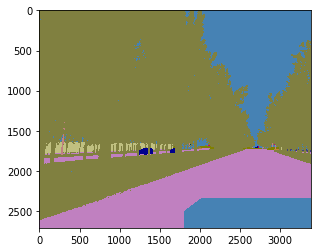

In [126]:
c = copy(b)
for k, v in color2label.items():
    row, col, _ = np.where(c==v[0].trainId)
    if len(row):
        c[row, col, :] = k
plt.imshow(c)

In [137]:
trainId = 0
name = trainId2label[trainId].name
print("Name of label with trainID '{id}': {name}".format(id=trainId, name=name))

Name of label with trainID '0': sky
